## Price Analysis with Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/Melbourne_housing_extra_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
Suburb           19740 non-null object
Address          19740 non-null object
Rooms            19740 non-null int64
Type             19740 non-null object
Price            15396 non-null float64
Method           19740 non-null object
SellerG          19740 non-null object
Date             19740 non-null object
Distance         19732 non-null float64
Postcode         19732 non-null float64
Bedroom2         15327 non-null float64
Bathroom         15327 non-null float64
Car              15327 non-null float64
Landsize         14944 non-null float64
BuildingArea     8617 non-null float64
YearBuilt        9351 non-null float64
CouncilArea      15296 non-null object
Lattitude        15448 non-null float64
Longtitude       15448 non-null float64
Regionname       19732 non-null object
Propertycount    19732 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 3.2+ MB


In [4]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,19740.000000,1.539600e+04,19732.000000,19732.000000,15327.000000,15327.000000,15327.000000,14944.000000,8617.000000,9351.000000,15448.000000,15448.000000,19732.000000
mean,2.947163,1.054957e+06,9.861509,3106.533904,2.900568,1.548509,1.578065,583.917090,196.806973,1874.165655,-37.811892,144.996632,7509.802706
std,0.981048,6.452557e+05,5.554233,88.429928,1.007491,0.713385,0.972221,3785.423175,561.558007,393.354888,0.072708,0.096178,4419.678648
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-38.182550,144.431620,249.000000
25%,2.000000,6.300000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,166.000000,94.000000,1930.000000,-37.856860,144.939323,4407.000000
50%,3.000000,8.800000e+05,9.200000,3101.000000,3.000000,1.000000,2.000000,420.000000,132.000000,1965.000000,-37.808965,145.000900,6567.000000
75%,4.000000,1.301000e+06,12.600000,3147.000000,3.000000,2.000000,2.000000,663.000000,199.000000,1997.000000,-37.761897,145.054710,10331.000000
max,12.000000,9.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,433014.000000,40468.000000,2106.000000,-37.413810,145.526350,21650.000000


In [6]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
# convert date into pandas date time
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [10]:
len(df['Date'].unique())/4

13.0

In [11]:
df['Date'][:3]

0   2016-09-03
1   2016-12-03
2   2016-02-04
Name: Date, dtype: datetime64[ns]

In [16]:
var = df[df['Type']=="h"].sort_values('Date', ascending=False).groupby('Date').std()
count = df[df['Type']=='h'].sort_values('Date', ascending=False).groupby('Date').count()
mean = df[df['Type']=='h'].sort_values('Date', ascending=False).groupby('Date').mean()

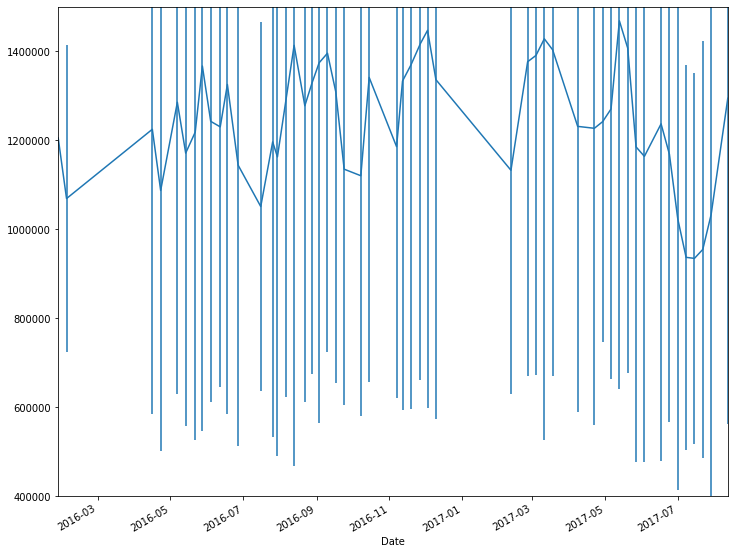

In [19]:
mean['Price'].plot(yerr=var['Price'], ylim=(400000,1500000), figsize=(12,10))

In [21]:
means = df[(df['Type']=='h') & (df['Distance']>13)].sort_values('Date', ascending=False).groupby('Date').mean()
errors = df[(df['Type']=='h') & (df['Distance']>13)].sort_values('Date', ascending=False).groupby('Date').std()

In [22]:
means.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

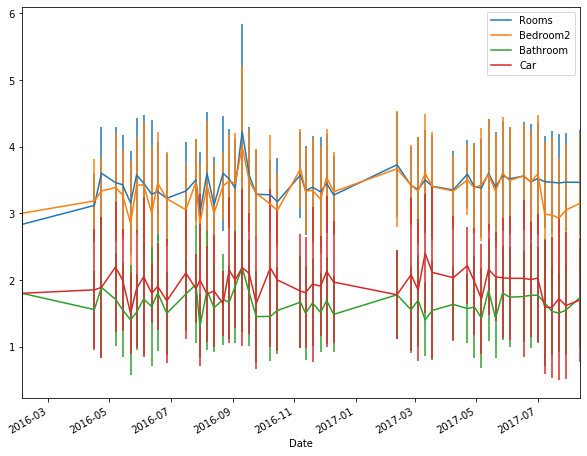

In [24]:
means.drop(["Price",
            "Postcode",            
           "Longtitude","Lattitude",
           "Distance","BuildingArea", "Propertycount","Landsize","YearBuilt"],axis=1).plot(yerr=errors, figsize=(10,8))

In [27]:
mean.head(5)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.842105,1.368421,1.842105,484.947368,126.333333,1963.076923,-37.834721,144.997153,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.089947,1.645503,1.645503,481.984127,154.068376,1942.500000,-37.803719,144.989346,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.034483,1.459770,1.528736,908.218391,145.666667,1941.431373,-37.784748,144.975782,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.164502,1.627706,1.670996,553.207792,166.137931,1945.369427,-37.816396,144.997093,7151.759717


In [29]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
df[(df['Type']=='h') & 
   (df['Distance']<14) & 
   (df['Distance']>13.7)].sort_values('Date', ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms   Price  Distance  Postcode  Bedroom2  \
Suburb            SellerG                                                      
Albion            Barry            2.3  735.0k      13.9      3.0k       2.3   
                  Bells            3.0  782.0k      13.9      3.0k       3.3   
                  Sweeney          3.0  596.5k      13.9      3.0k       3.0   
                  hockingstuart    3.0  730.0k      13.9      3.0k       3.0   
Altona            Barlow           3.0    1.1M      13.8      3.0k       3.0   
                  Compton          2.0  535.6k      13.8      3.0k       2.0   
                  Greg             3.8    1.1M      13.8      3.0k       3.8   
                  hockingstuart    3.0  928.8k      13.8      3.0k       3.0   
Bentleigh East    Beller           3.0  900.0k      13.9      3.2k       3.0   
                  Buxton           3.3    1.1M      13.9      3.2k       3.3   
                  C21              3.3  907.7k      13.9      3.2k       3.3   
                  First            4.0    1.0M      13.9      3.2k       3.0   
                  Gary             3.5    1.2M      13.9      3.2k       3.5   
                  Hodges           4.2    1.3M      13.9      3.2k       4.0   
                  Marshall         4.0    1.4M      13.9      3.2k       4.0   
                  Nick             3.0    1.0M      13.9      3.2k       3.0   
                  RT               4.0    1.2M      13.9      3.2k       4.0   
                  Ray              3.0  896.7k      13.9      3.2k       3.0   
                  Woodards         3.2    1.1M      13.9      3.2k       3.2   
                  hockingstuart    3.7    1.4M      13.9      3.2k       3.7   
Doncaster         Barry            3.6    1.4M      13.9      3.1k       3.6   
                  Fletchers        3.0    1.2M      13.9      3.1k       3.0   
                  Jellis           3.9    1.5M      13.9      3.1k       3.9   
                  Philip           3.5    1.4M      13.9      3.1k       3.5   
                  RW               4.0    1.4M      13.9      3.1k       4.0   
                  Ray              3.4    1.2M      13.9      3.1k       3.3   
                  Vic              3.0    1.1M      13.9      3.1k       3.0   
                  hockingstuart    3.5    1.5M      13.9      3.1k       3.0   
Hampton           Hodges           4.0    2.6M      13.8      3.2k       4.0   
Templestowe Lower Barry            3.8    1.2M      13.8      3.1k       3.8   
                  Jellis           3.6    1.3M      13.8      3.1k       3.6   
                  Mason            4.0  790.0k      13.8      3.1k       4.0   
                  Philip           3.3    1.0M      13.8      3.1k       3.3   
                  RT               3.0  650.0k      13.8      3.1k       3.0   
                  Zahn             4.0    1.2M      13.8      3.1k       4.0   
                  hockingstuart    4.5  875.0k      13.8      3.1k       4.5   
Viewbank          Barry            3.0  770.0k      13.8      3.1k       3.0   
                  Buckingham       3.0  880.0k      13.8      3.1k       3.0   
                  Darren           4.0    1.0M      13.8      3.1k       4.0   
                  Fletchers        4.0    1.2M      13.8      3.1k       4.0   
                  Miles            3.6  903.0k      13.8      3.1k       3.8   
                  Morrison         3.0  820.0k      13.8      3.1k       3.0   
                  Nelson           4.0  981.7k      13.8      3.1k       4.0   
                  Ray              3.0  765.0k      13.8      3.1k       3.0   

                                 Bathroom  Car  Landsize  BuildingArea  \
Suburb            SellerG                                                
Albion            Barry               1.0  1.0     634.3         118.0   
                  Bells               1.3  2.3     741.0         126.0   
                  Sweeney             1.5  1.5     651.0

In [31]:
import seaborn as sns

/Users/kumarujjawal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kumarujjawal/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


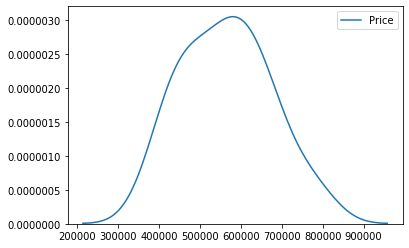

In [32]:
sns.kdeplot(df[(df['Suburb']=='Northcote') & 
               (df['Type']=='u') &
               (df['Rooms']==2)]['Price'])

In [34]:
from sklearn.model_selection import train_test_split